
Linear Regression considering 1 feature

Train Metrics:
MSE: (1.3618586756930053,) 
RMSE: 1.1669870075082265 
MAPE: 142324572671023.0 
R2: 0.0052754335314767475

Test Metrics:
MSE: (1.3885595634666783,) 
RMSE: 1.1783715727505812 
MAPE: 60703281590984.914 
R2: -0.00881950367199047

Linear Regression considering 3 features

Train Metrics:
MSE: (1.3246754212452727,) 
RMSE: 1.150945446685147 
MAPE: 136413459216867.97 
R2: 0.03243471027624467

Test Metrics:
MSE: (1.3682078405769447,) 
RMSE: 1.1697041679745117 
MAPE: 61523974522849.21 
R2: 0.005966477084378807

Cluster Centers:
[[-6.43163397e-02  1.35119249e-01  1.21115913e-01  1.87344662e-01
  -5.56479746e-01 -1.30810628e-01  2.70768114e-01  8.56379993e-02
   1.51309951e-01 -3.87023471e-02  2.03547445e-01 -1.35500880e-01
   2.06626292e-01  5.45275295e-04 -1.51002359e-01  1.37079900e-01
  -3.64296146e-01  1.57472194e-02 -4.85023565e-01 -2.31058245e-01
   5.81266664e-02 -2.81929742e-01 -3.14682549e-01  5.01178256e-02
   2.12865367e-01  1.500

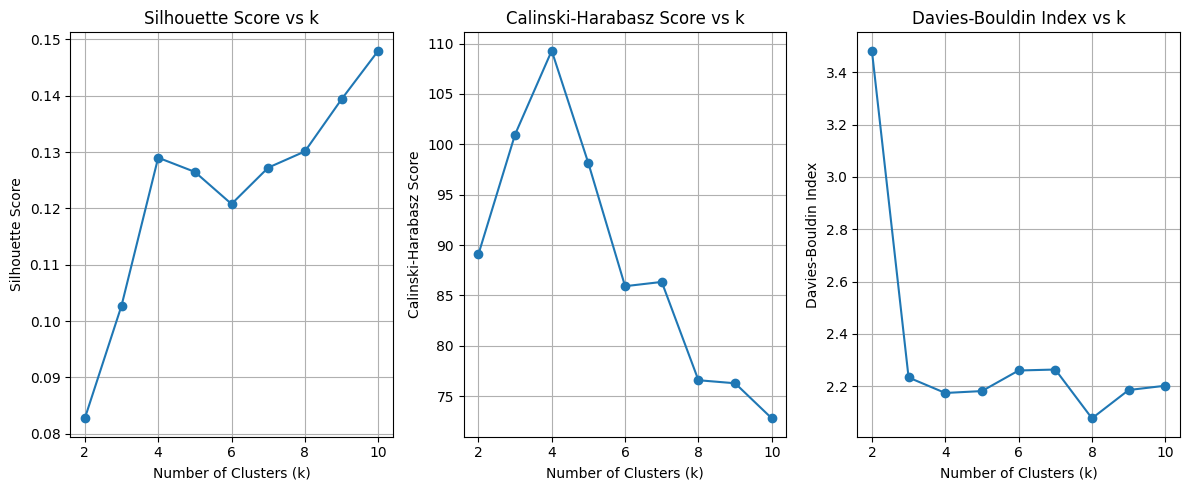

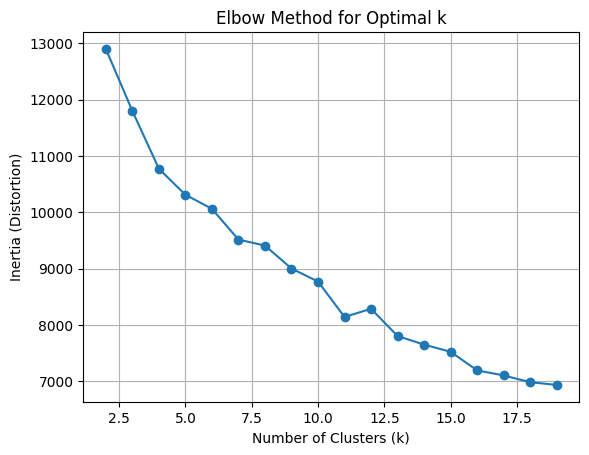

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

def load_data(file_path):
    data = pd.read_excel(file_path)
    return data

def split_data(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42)

def train_linear_regression(X_train, y_train):
    model = LinearRegression().fit(X_train, y_train)
    return model

def evaluate_model(model, X, y):
    y_pred = model.predict(X)

    mse= mean_squared_error(y, y_pred),
    rmse= np.sqrt(mean_squared_error(y, y_pred))
    mape= mean_absolute_percentage_error(y, y_pred)
    r2= r2_score(y, y_pred)

    return mse, rmse, mape, r2

def perform_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
    return kmeans

def get_cluster_info(kmeans):
    return kmeans.cluster_centers_, kmeans.labels_

def evaluate_clustering(X, labels):
    return {
        'Silhouette Score': silhouette_score(X, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(X, labels),
        'Davies-Bouldin Index': davies_bouldin_score(X, labels)
    }

def plot_clustering_scores(k_values, silhouette_scores, ch_scores, db_indices):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', label='Silhouette Score')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score vs k")
    plt.grid(True)

    plt.subplot(1, 3, 2)
    plt.plot(k_values, ch_scores, marker='o', linestyle='-', label='Calinski-Harabasz Score')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Calinski-Harabasz Score")
    plt.title("Calinski-Harabasz Score vs k")
    plt.grid(True)

    plt.subplot(1, 3, 3)
    plt.plot(k_values, db_indices, marker='o', linestyle='-', label='Davies-Bouldin Index')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Index")
    plt.title("Davies-Bouldin Index vs k")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def elbow_method(X, k_range):
    distortions = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
        distortions.append(kmeans.inertia_)
    return distortions

def plot_elbow(k_range, distortions):
    plt.plot(k_range, distortions, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Distortion)")
    plt.title("Elbow Method for Optimal k")
    plt.grid(True)
    plt.show()


file_path = "/training_mathbert.xlsx"
data = load_data(file_path)

# A1 & A2 - Linear Regression
print("\nLinear Regression considering 1 feature")
X, y = data[['embed_0']], data['output']
X_train, X_test, y_train, y_test = split_data(X, y)
model = train_linear_regression(X_train, y_train)
mse_train, rmse_train, mape_train, r2_train = evaluate_model(model, X_train, y_train)
mse_test, rmse_test, mape_test, r2_test = evaluate_model(model, X_test, y_test)

print("\nTrain Metrics:")
print(f"MSE: {mse_train} \nRMSE: {rmse_train} \nMAPE: {mape_train} \nR2: {r2_train}")
print("\nTest Metrics:")
print(f"MSE: {mse_test} \nRMSE: {rmse_test} \nMAPE: {mape_test} \nR2: {r2_test}")

# A3 - Linear Regression with 3 features
print("\nLinear Regression considering 3 features")
X = data[['embed_0', 'embed_1', 'embed_2']]
X_train, X_test, y_train, y_test = split_data(X, y)
model = train_linear_regression(X_train, y_train)
mse_train, rmse_train, mape_train, r2_train = evaluate_model(model, X_train, y_train)
mse_test, rmse_test, mape_test, r2_test = evaluate_model(model, X_test, y_test)

print("\nTrain Metrics:")
print(f"MSE: {mse_train} \nRMSE: {rmse_train} \nMAPE: {mape_train} \nR2: {r2_train}")
print("\nTest Metrics:")
print(f"MSE: {mse_test} \nRMSE: {rmse_test} \nMAPE: {mape_test} \nR2: {r2_test}")

# A4 - KMeans Clustering with k=2
X = data.drop(columns=['output'])
kmeans = perform_kmeans(X, k=2)
centers, labels = get_cluster_info(kmeans)
cluster_metrics = evaluate_clustering(X, labels)

print("\nCluster Centers:")
print(centers)
print("\nLabels:")
print(labels)

#A5 - Clustering evaluation metrics
print("\nClustering Metrics for k=2:")
for metric, value in cluster_metrics.items():
    print(f"{metric}: {value:.4f}")

# A6 - KMeans with different k values
k_values = range(2, 11)
silhouette_scores, ch_scores, db_indices = [], [], []
for k in k_values:
    kmeans = perform_kmeans(X, k)
    scores = evaluate_clustering(X, kmeans.labels_)
    silhouette_scores.append(scores['Silhouette Score'])
    ch_scores.append(scores['Calinski-Harabasz Score'])
    db_indices.append(scores['Davies-Bouldin Index'])

plot_clustering_scores(k_values, silhouette_scores, ch_scores, db_indices)

# A7 - Elbow Plot
distortions = elbow_method(X, range(2, 20))
plot_elbow(range(2, 20), distortions)


